In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

__Sample statistic :__ 

A metric calculated for a sample of data drawn from a larger population.

__Data distribution :__

The frequency distribution of individual values in a data set.

__Sampling distribution :__

The frequency distribution of a sample statistic over many samples or resamples.

__Central limit theorem :__

The tendency of the sampling distribution to take on a normal shape as sample
size rises.

__Standard error :__

The variability (standard deviation) of a sample statistic over many samples (not
to be confused with standard deviation, which by itself, refers to variability of
individual data values)

# Centeral Limit Theorem

It says that the means drawn from multiple samples will resemble the familiar bell shaped normal curve, even if the source population is not normally distributed, provided that the sample size is large enough and the
departure of the data from normality is not too great.

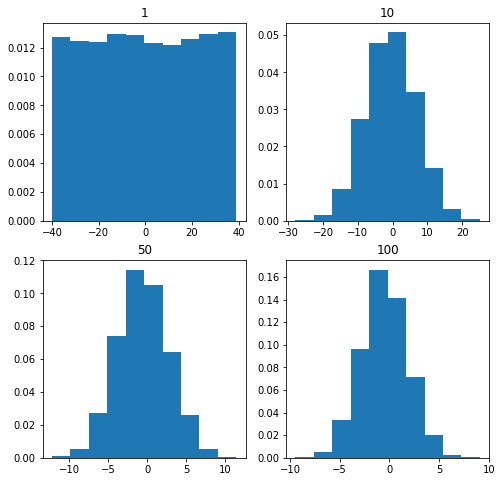

In [4]:
# Script from : https://www.geeksforgeeks.org/python-central-limit-theorem/

num = [1, 10, 50, 100]
means = []

for j in num:
    np.random.seed(1)
    x = [np.mean(
        np.random.randint(
            -40, 40, j)) for _i in range(10000)]
    means.append(x)


k = 0
fig, ax = plt.subplots(2, 2, figsize =(8, 8))
for i in range(0, 2):
    for j in range(0, 2):
        ax[i, j].hist(means[k], 10, density = True)
        ax[i, j].set_title(label = num[k])
        k = k + 1
plt.show()


# Standard Error

$\Large \text{Standard Error} = \frac{s}{\sqrt{n}}$

$n : $ number of samples

$s : $ Standard deviation of samples

Standard error should be smaller so that samples represents the population

In [5]:
np.std(means,axis=1)#/math.sqrt(len(means[0]))

array([23.17690042,  7.24291746,  3.28859308,  2.32164793])

# Real World Example

- Loan applicant's Income

In [6]:
path="/content/drive/MyDrive/Data Science/data/Class-9/loan-train.csv"
data=pd.read_csv(path)["ApplicantIncome"].to_numpy()
data

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  2600,  3365,  3717,  9560,  2799,
        4226,  1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,
        1828,  3667,  4166,  3748,  3600,  1800,  2400,  3941,  4695,
        3410,  5649,  5821,  2645,  4000,  1928,  3086,  4230,  4616,
       11500,  2708,  2132,  3366,  8080,  3357,  2500,  3029,  2609,
        4945,  4166,  5726,  3200, 10750,  7100,  4300,  3208,  1875,
        3500,  4755,  5266,  3750,  3750,  1000,  3167,  3333,  3846,
        2395,  1378,  6000,  3988,  2366,  3333,  2500,  8566,  5695,
        2958,  6250,  3273,  4133,  3620,  6782,  2484,  1977,  4188,
        1759,  4288,  4843, 13650,  4652,  3816,  3052, 11417,  7333,
        3800,  2071,  5316,  2929,  3572,  7451,  5050, 14583,  3167,
        2214,  5568, 10408,  5667,  4166,  2137,  2957,  4300,  3692,
       23803,  3865,

246.34000950188303

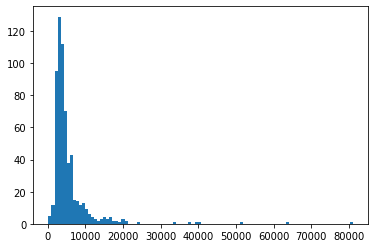

In [7]:
# Whole sample data distribution
_=plt.hist(data,bins=100)
standard_error=np.std(data)/math.sqrt(len(data))
standard_error

- The distribution is not bell shaped because the number of samples are not large enough

- The sample represents the population if number of samples are large enough

- Let's understand this by below example

[ 6822  2500  3400  3727  6782  4300  3588  2281  6250  2935  6400  3089
  2900  2876 11250  1993  2192  2400  2958  2920  2137  2755  3522  1820
 39147  7787 16667  4000  9833 18165  3430  2947  2330  2309  8750  1958
  6080  6383  2301  3850  3541  4625 10000   674  5285  2583  5250  3466
  3400  3708 11000  4281  3691  9538  3500  2253  6045  3598  3029  2971
  4583  8333  4230  3865  3200  5815  1875  3075  3153  3988  2045  4652
  4652  3189  1538   150  4200  3400  3459  5503  2875  4691  5166  1500
  1853  6133  9166 14866  2483  4547  3100  2333  6608  3015  4923  3013
  4945  3667  2167  7660]


460.5127560187666

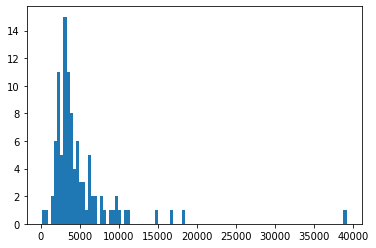

In [8]:
sample_data=np.random.choice(data,100,replace=False)
print(sample_data)
_=plt.hist(sample_data,bins=100)
standard_error=np.std(sample_data)/math.sqrt(len(sample_data))
standard_error

In [9]:
number_of_samples=10000 #R
size_of_sample=100 #n
sample_mean=[]
for i in range(number_of_samples):
    sample_mean.append(np.mean(np.random.choice(data,size_of_sample,replace=False)))
#sample_mean

5.607286813630696

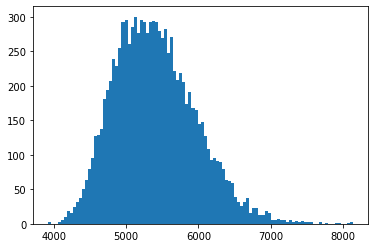

In [ ]:
_=plt.hist(sample_mean,bins=100)
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
standard_error

# Bootstrap

- A sample taken with replacement from an observed data set.

The steps,

1. Draw a sample value, record it, and then replace it.
2. Repeat n times.
3. Record the mean of the n resampled values.
4. Repeat steps 1–3 R times.

In [10]:
number_of_samples=10000 # R times
size_of_sample=300  # n
sample_mean=[]
for i in range(number_of_samples):
    # Calulate mean for n samples
    sample_mean.append(np.mean(np.random.choice(data,size_of_sample,replace=True)))

3.5134986629734537

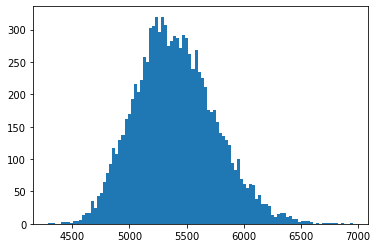

In [11]:
_=plt.hist(sample_mean,bins=100)
standard_error=np.std(sample_mean)/math.sqrt(len(sample_mean))
standard_error

# Note

The bootstrap does not compensate for a small sample size; it does
not create new data, nor does it fill in holes in an existing data set.
It merely informs us about how lots of additional samples would
behave when drawn from a population like our original sample.

# Confidence Interval

The percentage of confidence intervals, constructed in the same way from the
same population, that are expected to contain the statistic of interest.

Steps, 

1. Draw a random sample of size n with replacement from the data (a resample).
2. Record the statistic of interest for the resample.
3. Repeat steps 1–2 many (R) times.
4. For an x% confidence interval, trim [(100-x) / 2]% of the R resample results from
either end of the distribution.
5. The trim points are the endpoints of an x% bootstrap confidence interval.

In [14]:
CI=0.3
sorted_means=np.sort(sample_mean)
l=len(sorted_means)
idx=math.floor(l*((1-CI)/2))

print("Lower level :", sorted_means[idx])
print("Upper level :", sorted_means[l-idx-1])

Lower level : 5245.483333333334
Upper level : 5520.653333333334
